In [2]:
import matplotlib.pyplot as plt
time=[]
for i in range(-1,10000):
    time.append(i)

In [3]:
class pulse:
    def __init__(self, id,pri=500,pwd=10,R=10):
        self.id = id                                       # Id of the radar
        self.pri = pri                                     # Pulse Repetition Interval
        self.pwd = pwd                                     # Pulse Width
        self.R = R                                         # Distance between the radar and the aircraft
        self.pi=3.14159265359                              # Pi is a universal constant
        self.Pt=10                                         # Peak transmitted power
        self.G=1                                           # Antenna Gain
        self.P=(self.Pt*self.G)/(4*self.pi*(self.R**2))    # Power recieved by the aircraft radar reciver
        self.pulse_train=[]                                # we are producing the pulse train based on the above information
        for i in range(-1,10000):
            if(i%self.pri<=self.pwd):
                self.pulse_train.append(self.P)
            else:
                self.pulse_train.append(0)

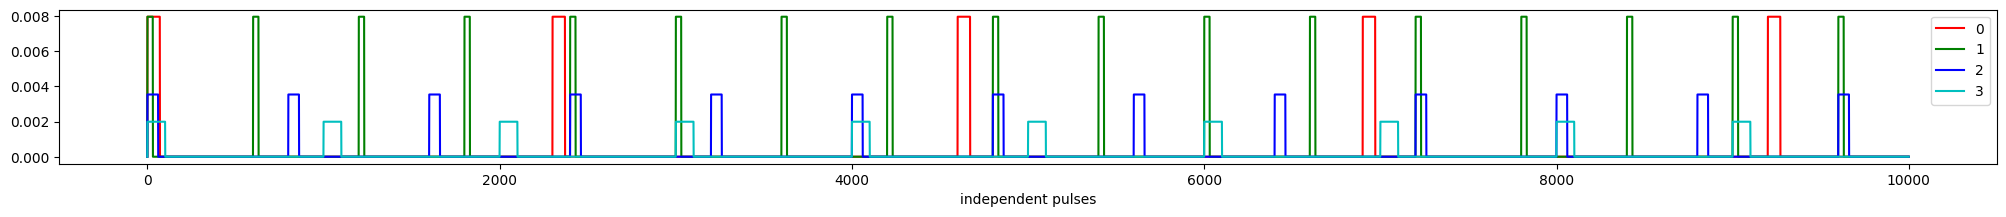

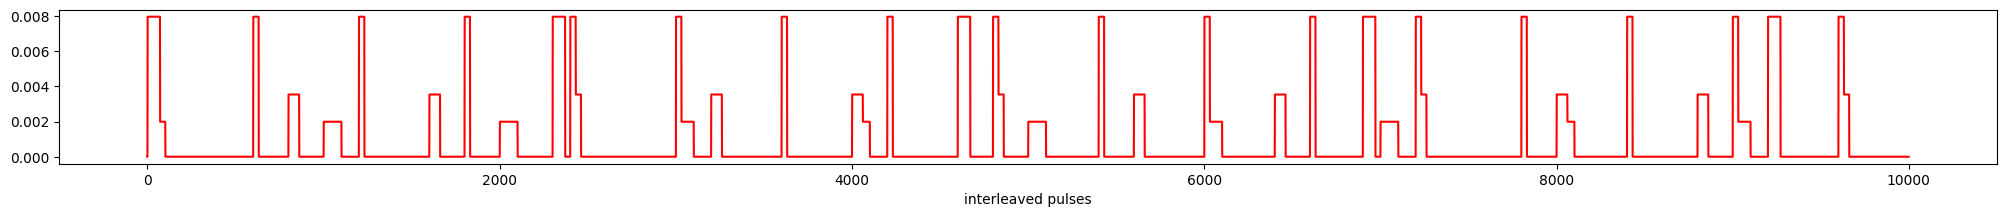

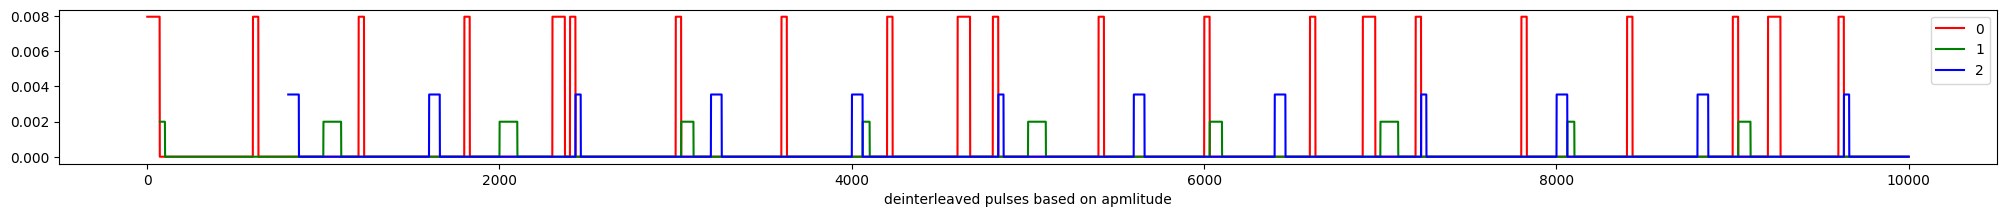

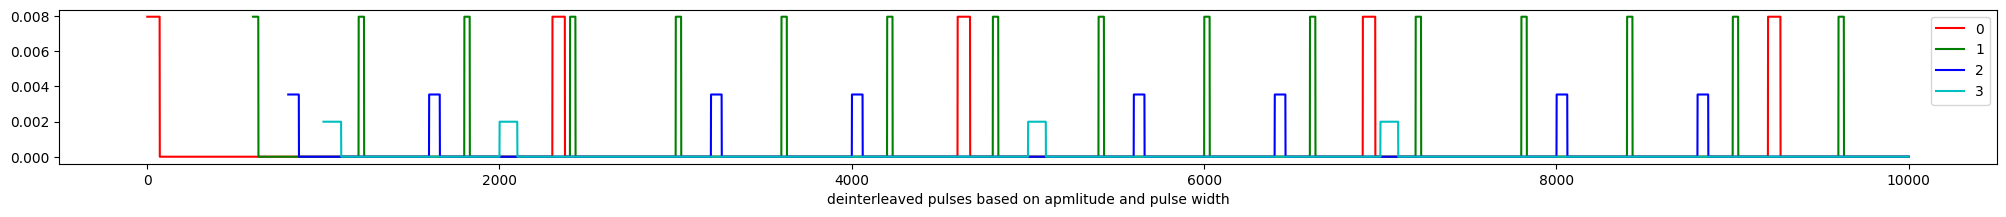

In [20]:
pulses=[]

pulse_0 = pulse(id=0,pri=2300,pwd=70,R=10)
pulses.append(pulse_0)

pulse_1 = pulse(id=1,pri=600,pwd=30,R=10)
pulses.append(pulse_1)

pulse_2 = pulse(id=2,pri=800,pwd=60,R=15)
pulses.append(pulse_2)

pulse_3 = pulse(id=3,pri=1000,pwd=100,R=20)
pulses.append(pulse_3)

ci=0#len(time)//4
cf=len(time)//1
clrs= 'rgbcmyk'
fig_x , fig_y = 25 , 2

plt.figure(figsize=(fig_x , fig_y))
for i in pulses:
    plt.plot(time[ci:cf],i.pulse_train[ci:cf], color=clrs[i.id], label=str(i.id))
plt.legend()
plt.xlabel("independent pulses")
plt.show()

pulse_f=[]
for i in time:
    max_t=[]
    for j in pulses:
        max_t.append(j.pulse_train[i])
    pulse_f.append(max(max_t))
plt.figure(figsize=(fig_x , fig_y))
plt.plot(time[ci:cf],pulse_f[ci:cf], color='r')
plt.xlabel("interleaved pulses")
plt.show()

deinterleaved_pulses={}
for i in pulse_f:
    if i!=0:
        if(i not in deinterleaved_pulses):
            deinterleaved_pulses[i]=[]
    for j in list(deinterleaved_pulses.keys()):
        if j==i:
            deinterleaved_pulses[j].append(i)
        else:
            deinterleaved_pulses[j].append(0)

plt.figure(figsize=(fig_x , fig_y))
idx=0
for i in list(deinterleaved_pulses.values()):
    plt.plot(time[(cf-len(i[ci:cf])):cf],i[ci:cf], color=clrs[idx], label=str(idx))
    idx+=1
plt.legend()
plt.xlabel("deinterleaved pulses based on apmlitude")
plt.show()

deinterleaved_pulses={}
pwd_counter = 0
pwd_counter_before = 0
pwd_counter_after = 0
pwd_value = 0
lead_edge=False
fall_edge=False
pwd_set=set()
idx=0
for i in pulse_f:
    idx+=1
    if(i!=0):
        if(pwd_value==0):
            pwd_value=i
            lead_edge=True
        if(pwd_value!=i):
            if(i<pwd_value):
                lead_edge=False
                pwd_counter_after+=1
            else:
                pwd_value=i
                lead_edge=True
                pwd_counter_before=pwd_counter
                pwd_counter=0
        if(lead_edge):
            pwd_counter+=1
        fall_edge=True
    else:
        if(fall_edge):
            flg=True
            for l in list(deinterleaved_pulses.keys()):
                if(l[0]==pwd_value and l[1]==pwd_counter-1):
                    flg=False
            if flg:
                deinterleaved_pulses[(pwd_value,pwd_counter-1)]=[]
            for j in list(deinterleaved_pulses.keys()):
                if(j==(pwd_value,pwd_counter-1)):
                    for k in range(pwd_counter_before):
                        deinterleaved_pulses[j].append(0)
                    for k in range(pwd_counter):
                        deinterleaved_pulses[j].append(pwd_value)
                    for k in range(pwd_counter_after):
                        deinterleaved_pulses[j].append(0)
                else:
                    for k in range(pwd_counter_before):
                        deinterleaved_pulses[j].append(0)
                    for k in range(pwd_counter):
                        deinterleaved_pulses[j].append(0)
                    for k in range(pwd_counter_after):
                        deinterleaved_pulses[j].append(0)
        lead_edge=False
        fall_edge=False
        pwd_value=0
        pwd_counter=0
        pwd_counter_before=0
        pwd_counter_after=0
        for j in deinterleaved_pulses.values():
            j.append(0)

plt.figure(figsize=(fig_x , fig_y))
idx=0
for i in list(deinterleaved_pulses.values()):
    plt.plot(time[(cf-len(i[ci:cf])):cf],i[ci:cf], color=clrs[idx], label=str(idx))
    idx+=1
plt.legend()
plt.xlabel("deinterleaved pulses based on apmlitude and pulse width")
plt.show()